# Will the Customer Accept the Coupon?
**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

## Findings Summary

For the Coffee coupons group, we want to explore the demographics and conditions that would cause a driver to accept or reject a coupon. 

The following are all factors with higher than the baseline coffee coupon acceptance rate (49.6%).
- Passenger was a Friend (60%)
- Occupation was a Student (61%)
- No urgent destination (58%)
- Previously went to a coffee more than 1 time (66%)

**Recommendation and Action Items**

These factors can be used individually or together for a targeted campaign. 

When combined, a greater acceptance rate was achieved (82%). 


![](images/Coupon%20Acceptance%20Rate%20by%20Type.png)


![](images/CoffeeCouponAcceptanceRateOfCoffeeHouseVisitFrequency.png)

Note: In this chart, it can be seen that individuals who never have visited a coffee shop in the last month are more inclined to reject the coupon.

![](images/DestinationOfDriversOfferedCoffeeCoupon.png)
![](images/OccupationOfDriversOfferedCoffeeCoupon.png)



## Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Initial Data Preparation & Analysis

#### 1. Read in the `coupons.csv` file.




In [74]:
data = pd.read_csv("data/coupons.csv")

In [75]:
pd.set_option("display.max_rows", 5)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### 2. Investigate the dataset for missing or problematic data.

In [76]:
# Investigate overall data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

**Observation:**

Basic, Conceputal and Demographics data seems complete: 
     destination, passenger, weather, temperature, time coupon, expiration, 
     gender, age, maritalStatus, has_children, education, occupation, income

In [77]:
# Understand Missing Data - Count missing values

data.isnull().sum()

destination      0
passanger        0
                ..
direction_opp    0
Y                0
Length: 26, dtype: int64

**Observation:**

Some survey data is incomplete but may be usable - This includes frequency data on Bar, 
Coffee House, Carry Away and Restaurant visits


In [78]:
# Passenger column spelled wrong. Correct it.
data = data.rename(columns={"passanger": "passenger"})

In [79]:
# Check Values for key fields
print("-----")
print(data["coupon"].value_counts())
print("-----")
print(data["temperature"].value_counts())
print("-----")
print(data["Bar"].value_counts())
print("-----")
print(data["Y"].value_counts())
print("-----")
print(data["age"].value_counts())
print("-----")
print(data["passenger"].value_counts())
print("-----")
print(data["occupation"].value_counts())
print("-----")
print(data["maritalStatus"].value_counts())
print("-----")
print(data["RestaurantLessThan20"].value_counts())
print("-----")
print(data["income"].value_counts())

-----
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
-----
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
-----
Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
-----
Y
1    7210
0    5474
Name: count, dtype: int64
-----
age
21         2653
26         2559
           ... 
46          686
below21     547
Name: count, Length: 8, dtype: int64
-----
passenger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
-----
occupation
Unemployed                                   1870
Student                                      1584
                                             ... 
Building & Grounds Cleaning & Maintenance      44
Farming Fishing & Forestry                     43
Name: count, Length: 25, dtype: int64
-----
maritalStatus
Married 

In [80]:
# Car Field has many many missing fields. Let's take a look.
data["car"].value_counts()

# Since the dataset is drivers enroute who got pushed a coupon, it would be weird if
#  someone who reported their car as "does not drive" was "Alone"
data[data["car"] == "do not drive"]

# Identify how many people who do not drive were driving alone to ascertain data quality
data.loc[(data["car"] == "do not drive") & (data["passenger"] == "Alone")]

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
7305,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,0
7307,No Urgent Place,Alone,Sunny,55,6PM,Coffee House,2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7325,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,1,0,1,1
7326,Work,Alone,Sunny,80,7AM,Restaurant(<20),1d,Female,26,Single,...,less1,1~3,1~3,1~3,1,0,0,1,0,1


**Observation:**

Car survey data is not usable and of poor quality. ignore the "Car" survey response

In [81]:
# What percentage of records are missing at least one survey response for
#  the Bar, Coffee House, Carry Away and Restaurant visits?

null_rows = data.loc[
    data["Bar"].isnull()
    | data["CoffeeHouse"].isnull()
    | data["CarryAway"].isnull()
    | data["RestaurantLessThan20"].isnull()
    | data["Restaurant20To50"].isnull()
]

print(len(null_rows.index) / len(data.index))

0.04769788710186061


**Observation:**

4.7% of the fields are missing at least one survey response for 
the Bar, Coffee House, Carry Away and Restaurant visits. Since this number is small, it is accepable to drop these records

#### 3. Decide what to do about your missing data -- drop, replace, other...

- Remove car column
- Remove rows with one or more survey results (excluding car)

In [82]:
# Remove car column
data.drop(columns=["car"])

# Remove rows with one or more survey results (excluding car)
data = data.loc[
    ~(
        data["Bar"].isnull()
        | data["CoffeeHouse"].isnull()
        | data["CarryAway"].isnull()
        | data["RestaurantLessThan20"].isnull()
        | data["Restaurant20To50"].isnull()
    )
]

data

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


#### 4. What proportion of the total observations chose to accept the coupon?



In [83]:
accept_coupon = data["Y"].value_counts(normalize=True)
accept_coupon[1]

0.5693352098683666

**Conclusion:**

After data cleanup, 57% total observations chose to accept the coupon

#### 5. Use a bar plot to visualize the `coupon` column.

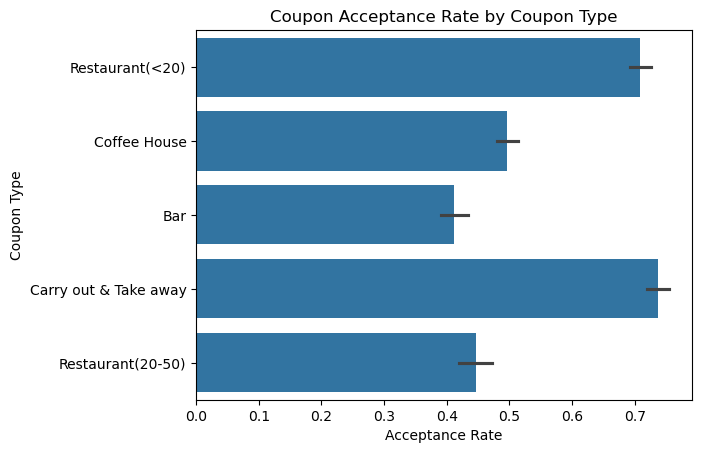

In [84]:
ax = sns.barplot(data=data, x="Y", y="coupon")
ax.set(xlabel="Acceptance Rate", ylabel="Coupon Type")
ax.set_title("Coupon Acceptance Rate by Coupon Type")
plt.savefig("images/Coupon Acceptance Rate by Type.png")
plt.show()


#### 6. Use a histogram to visualize the temperature column.

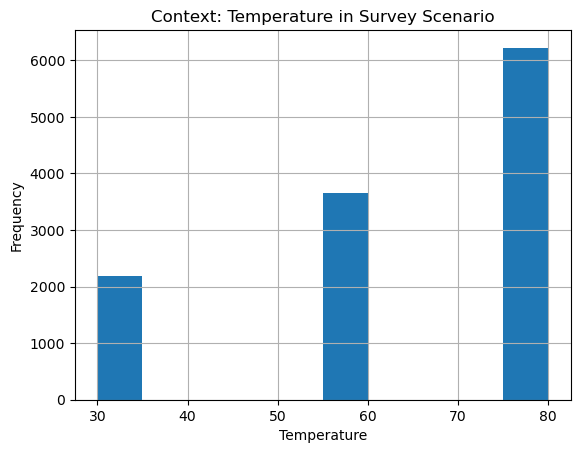

In [85]:
ax = data.hist("temperature")
ax[0, 0].set_xlabel("Temperature")
ax[0, 0].set_ylabel("Frequency")
plt.title("Context: Temperature in Survey Scenario")

plt.savefig("images/Context Temperature in Survey Scenario.png")
plt.show()

### Investigating Bar Coupons

Exploration of just the bar related coupons.  

#### 1. Create a new `DataFrame` that contains just the bar coupons.


In [86]:
bar_df = data.loc[data["coupon"] == "Bar"]

bar_df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


#### 2. What proportion of bar coupons were accepted?


In [87]:
accepted_bar_coupons = bar_df["Y"].value_counts(normalize=True)

accepted_bar_coupons[1]

0.41191845269210664

#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [88]:
acceptance_rate_bar_3_or_fewer = bar_df.groupby(
    (bar_df["Bar"] == "never") | (bar_df["Bar"] == "less1") | (bar_df["Bar"] == "1~3")
)[["Y"]].mean()
acceptance_rate_bar_3_or_fewer

,Y
Bar,
False,0.761658
True,0.372674


**Conclusion:**

The bar coupon acceptance rate of those who went to a bar 3 or fewer times a month was 37% compared to an acceptance rate of 76%  of those who went more frequently.

#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [89]:
acceptance_rate_bar_more_once_over_25 = bar_df.groupby(
    ((bar_df["Bar"] == "1~3") | (bar_df["Bar"] == "4~8") | (bar_df["Bar"] == "gt8"))
    & (
        (bar_df["age"] == "26")
        | (bar_df["age"] == "31")
        | (bar_df["age"] == "50plus")
        | (bar_df["age"] == "36")
        | (bar_df["age"] == "41")
        | (bar_df["age"] == "46")
    )
)[["Y"]].mean()
acceptance_rate_bar_more_once_over_25

,Y
False,0.337748
True,0.689826


#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [90]:
gt_once_a_month = ["1~3", "4~8", "ge8"]
passengers_not_kid = ["Friend(s)", "Partner"]


acceptance_rate_bar_passenger_occupation = bar_df.groupby(
    bar_df["Bar"].isin(gt_once_a_month)
    & bar_df["passenger"].isin(passengers_not_kid)
    & ~(bar_df["occupation"] == "Farming Fishing & Forestry")
)[["Y"]].mean()

acceptance_rate_bar_passenger_occupation

,Y
False,0.382100
True,0.717647


#### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [91]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed

accept_rate = bar_df.groupby(
    bar_df["Bar"].isin(gt_once_a_month)
    & bar_df["passenger"].isin(passengers_not_kid)
    & ~(bar_df["maritalStatus"] == "Widowed")
)[["Y"]].mean()

accept_rate

,Y
False,0.382100
True,0.717647


In [92]:
# go to bars more than once a month and are under the age of 30
under_30 = ["21", "26", "below21"]
accept_rate = bar_df.groupby(
    bar_df["Bar"].isin(gt_once_a_month) & bar_df["age"].isin(under_30)
)[["Y"]].mean()

accept_rate

,Y
False,0.357628
True,0.710884


In [93]:
# - go to cheap restaurants more than 4 times a month and income is less than 50K.
gt_4_month = ["4~8", "gt8"]
income_lt_50 = [
    "$25000 - $37499",
    "$12500 - $24999",
    "$37500 - $49999",
    "Less than $12500",
]

accept_rate = bar_df.groupby(
    bar_df["RestaurantLessThan20"].isin(gt_4_month)
    & bar_df["income"].isin(income_lt_50)
)[["Y"]].mean()

accept_rate

,Y
False,0.402532
True,0.456456


#### 7.  Conslusions
**Conclusion:**

The group that went to bars more tha once a month had around a 70% acceptance rate of bar coupons and factors such as age, passenger, marital status, and occupation only made a minimal impact. This is significant as the general population only had about a 40% acceptance rate.


### Investigating Coffee Coupons

Explore one of the "Coffee" coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### 1. Prepare Data

In [94]:
# Filter by Coffee Coupons
coffee_df = data.loc[data["coupon"] == "Coffee House"]
coffee_df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


#### 2. Identify characteristics that occur frequently

Find out what groups accepted the coupons.

In [95]:
# Show Popular Parameters for drivers who accepted the coupon
coffee_df_Y = coffee_df[coffee_df["Y"] == 1]

cat_cols_Y = coffee_df_Y.select_dtypes(include=object).columns.tolist()
summary_Y = (
    pd.DataFrame(
        coffee_df_Y[cat_cols_Y]
        .melt(var_name="column", value_name="value")
        .value_counts()
    )
    .rename(columns={"count": "count_Y"})
    .sort_values(by=["column", "count_Y"], ascending=False)
)

pd.set_option("display.max_rows", None)


summary_Y

count_Y
column               value                                             
weather              Sunny                                         1661
                     Snowy                                          122
                     Rainy                                          111
time                 10AM                                           544
                     6PM                                            430
                     2PM                                            414
                     7AM                                            385
                     10PM                                           121
passenger            Alone                                          936
                     Friend(s)                                      702
                     Partner                                        165
                     Kid(s)                                          91
occupation           Unemployed                                     296
                     Student                                        292
                     Computer & Mathematical                        217
                     Sales & Related                                139
                     Management                                     123
                     Education&Training&Library                     113
                     Arts Design Entertainment Sports & Media        95
                     Office & Administrative Support                 84
                     Business & Financial                            67
                     Retired                                         65
                     Healthcare Practitioners & Technical            54
                     Transportation & Material Moving                47
                     Healthcare Support                              40
                     Architecture & Engineering                      35
                     Food Preparation & Serving Related              31
                     Life Physical Social Science                    29
                     Legal                                           26
                     Protective Service                              26
                     Community & Social Services                     25
                     Installation Maintenance & Repair               25
                     Construction & Extraction                       22
                     Personal Care & Service                         20
                     Production Occupations                           9
                     Building & Grounds Cleaning & Maintenance        8
                     Farming Fishing & Forestry                       6
maritalStatus        Single                                         770
                     Married partner                                720
                     Unmarried partner                              318
                     Divorced                                        74
                     Widowed                                         12
income               $12500 - $24999                                312
                     $37500 - $49999                                306
                     $25000 - $37499                                287
                     $100000 or More                                257
                     $50000 - $62499                                255
                     Less than $12500                               161
                     $87500 - $99999                                130
                     $62500 - $74999                                118
                     $75000 - $87499                                 68
gender               Female                                         967
                     Male                                           927
expiration           1d                                             983
                     2h         

#### 3. Compare to groups that didnt accept the coupon

In [96]:
# Show Popular Parameters for drivers who did not accept the coupon
coffee_df_N = coffee_df[coffee_df["Y"] == 0]

cat_cols_N = coffee_df_N.select_dtypes(include=object).columns.tolist()
summary_N = (
    pd.DataFrame(
        coffee_df_N[cat_cols_N]
        .melt(var_name="column", value_name="value")
        .value_counts()
    )
    .rename(columns={"count": "count_N"})
    .sort_values(by=["column", "count_N"], ascending=False)
)


summary_N

count_N
column               value                                             
weather              Sunny                                         1655
                     Snowy                                          163
                     Rainy                                          104
time                 6PM                                            613
                     7AM                                            490
                     2PM                                            345
                     10AM                                           313
                     10PM                                           161
passenger            Alone                                         1221
                     Friend(s)                                      473
                     Partner                                        126
                     Kid(s)                                         102
occupation           Unemployed                                     255
                     Computer & Mathematical                        216
                     Sales & Related                                209
                     Student                                        183
                     Education&Training&Library                     160
                     Management                                     148
                     Office & Administrative Support                108
                     Retired                                         96
                     Arts Design Entertainment Sports & Media        95
                     Business & Financial                            75
                     Food Preparation & Serving Related              46
                     Legal                                           43
                     Community & Social Services                     41
                     Life Physical Social Science                    32
                     Protective Service                              32
                     Transportation & Material Moving                29
                     Architecture & Engineering                      28
                     Healthcare Support                              25
                     Construction & Extraction                       24
                     Personal Care & Service                         22
                     Installation Maintenance & Repair               19
                     Healthcare Practitioners & Technical            17
                     Production Occupations                          11
                     Farming Fishing & Forestry                       5
                     Building & Grounds Cleaning & Maintenance        3
maritalStatus        Married partner                                746
                     Single                                         727
                     Unmarried partner                              358
                     Divorced                                        69
                     Widowed                                         22
income               $25000 - $37499                                330
                     $100000 or More                                268
                     $50000 - $62499                                257
                     $37500 - $49999                                253
                     $12500 - $24999                                253
                     $75000 - $87499                                160
                     $62500 - $74999                                153
                     Less than $12500                               137
                     $87500 - $99999                                111
gender               Female                                        1002
                     Male                                           920
expiration           2h                                            1212
                     1d         

#### 4. Establish Baseline

Overall, what was the acceptance rate of "Coffee" coupons?

In [97]:
accepted_coffee_coupons = coffee_df["Y"].value_counts(normalize=True)

accepted_coffee_coupons[1]

0.49633123689727465

**Observation:**

Roughly 50% of all groups accepted the coffee coupon. This is the baseline. 

#### 5. Compare acceptance rates where the ratio between accepted vs not accepted is high

- Passenger was a Friend
- Occupation was a Student
- No urgent destination
- Previously went to a coffee more than 1 time

In [98]:
# Passenger was a Friend

acceptance_rate = coffee_df.groupby(coffee_df["passenger"] == "Friend(s)")[["Y"]].mean()

acceptance_rate

,Y
passenger,
False,0.451344
True,0.597447


In [99]:
# Occupation was a Student

acceptance_rate = coffee_df.groupby(coffee_df["occupation"] == "Student")[["Y"]].mean()

acceptance_rate

,Y
occupation,
False,0.479497
True,0.614737


In [100]:
# No urgent destination

acceptance_rate = coffee_df.groupby(coffee_df["destination"] == "No Urgent Place")[
    ["Y"]
].mean()

acceptance_rate

,Y
destination,
False,0.401021
True,0.578178


In [101]:
# Previously went to a coffee more than 1 time
more_once_a_month = ["1~3", "4~8", "ge8"]

acceptance_rate = coffee_df.groupby(coffee_df["CoffeeHouse"].isin(more_once_a_month))[
    ["Y"]
].mean()

acceptance_rate

,Y
CoffeeHouse,
False,0.387773
True,0.659240


#### 6. Try some combinations

In [102]:
# Students who went to coffee houses more than once
acceptance_rate = coffee_df.groupby(
    coffee_df["CoffeeHouse"].isin(more_once_a_month)
    & (coffee_df["occupation"] == "Student")
)[["Y"]].mean()

acceptance_rate

,Y
False,0.484848
True,0.684932


In [103]:
# No Urgent Destinatino and with a friend
acceptance_rate = coffee_df.groupby(
    (coffee_df["destination"] == "No Urgent Place")
    & (coffee_df["passenger"] == "Friend(s)")
)[["Y"]].mean()

acceptance_rate

,Y
False,0.451344
True,0.597447


In [104]:
# Student with a Friend with no urgent destination and previously went to coffee 1 or more times
acceptance_rate = coffee_df.groupby(
    (coffee_df["destination"] == "No Urgent Place")
    & (coffee_df["passenger"] == "Friend(s)")  & (coffee_df["occupation"] == "Student")
    & coffee_df["CoffeeHouse"].isin(more_once_a_month)

)[["Y"]].mean()

acceptance_rate

,Y
False,0.490118
True,0.819444


#### 7. Some Visualization

Show how different factors affect acceptance. 

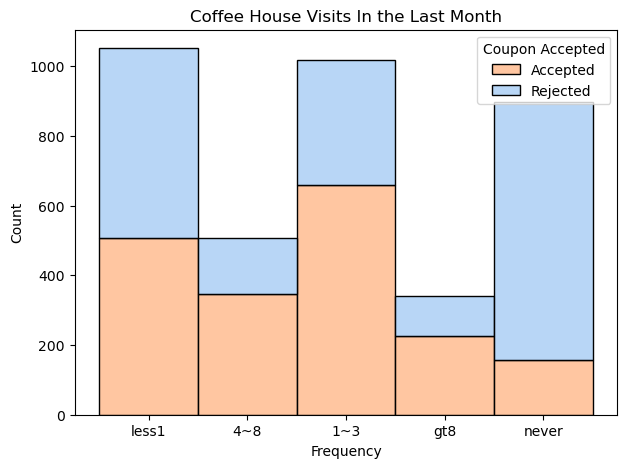

In [105]:
# Coffee house Visits Chart

f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)
sns.histplot(data=coffee_df, ax=ax, stat="count", multiple="stack",
             x="CoffeeHouse", kde=False,
             palette="pastel", hue="Y",
             element="bars", legend=True)
ax.set_title("Coffee House Visits In the Last Month")
ax.set_xlabel("Frequency")
ax.set_ylabel("Count")
plt.legend(title='Coupon Accepted', labels=['Accepted', 'Rejected'])

plt.savefig("images/CoffeeCouponAcceptanceRateOfCoffeeHouseVisitFrequency.png")
plt.show()

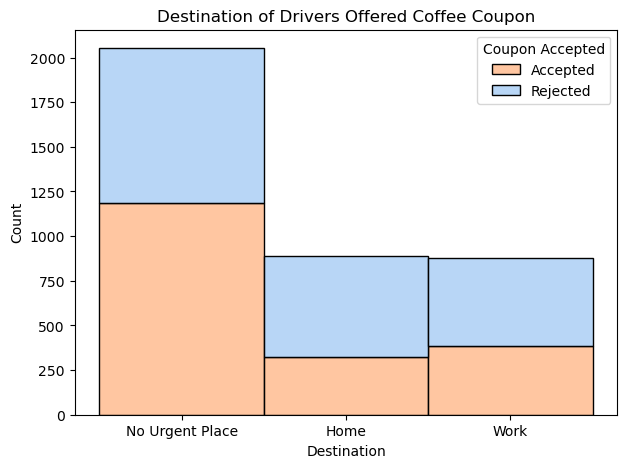

In [106]:
# Destinations Chart

f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)
sns.histplot(data=coffee_df, ax=ax, stat="count", multiple="stack",
             x="destination", kde=False,
             palette="pastel", hue="Y",
             element="bars", legend=True)
ax.set_title("Destination of Drivers Offered Coffee Coupon")
ax.set_xlabel("Destination")
ax.set_ylabel("Count")
plt.legend(title='Coupon Accepted', labels=['Accepted', 'Rejected'])

plt.savefig("images/DestinationOfDriversOfferedCoffeeCoupon.png")
plt.show()

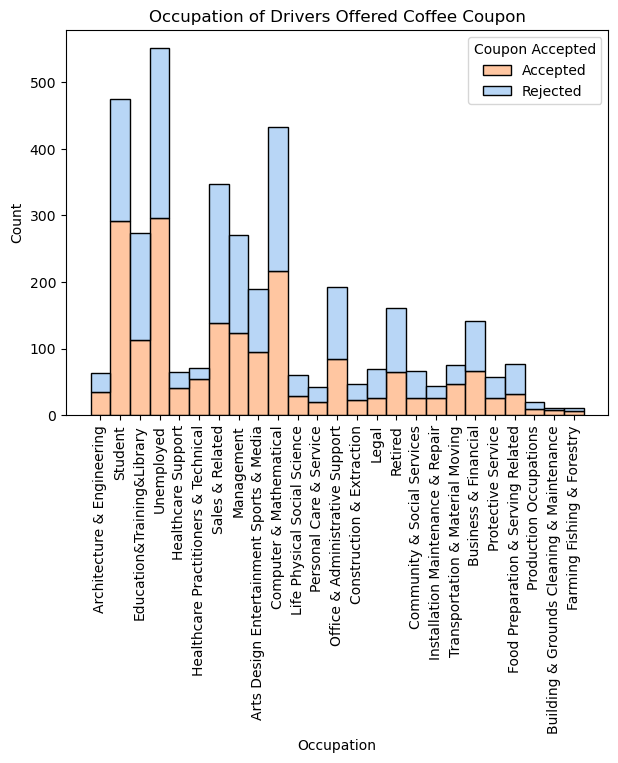

In [107]:
# Occupations Chart

f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)
sns.histplot(data=coffee_df, ax=ax, stat="count", multiple="stack",
             x="occupation", kde=False,
             palette="pastel", hue="Y",
             element="bars", legend=True)
ax.set_title("Occupation of Drivers Offered Coffee Coupon")
ax.set_xlabel("Occupation")
ax.set_ylabel("Count")
plt.legend(title='Coupon Accepted', labels=['Accepted', 'Rejected'])
plt.xticks(rotation=90)

plt.savefig("images/OccupationOfDriversOfferedCoffeeCoupon.png")
plt.show()

#### 8. Conclusions

The following are all factors with higher than the baseline coffee coupon acceptance rate (49.6%).
- Passenger was a Friend (60%)
- Occupation was a Student (61%)
- No urgent destination (58%)
- Previously went to a coffee more than 1 time (66%)

When combined, a greater acceptance rate was achieved (82%).


